# Student Performance Analysis

## Objective

This notebook aims to analyze student behavior in learning management systems as a predictor of learning success. The study will employ data mining techniques with different feature sets, including LMS data, course characteristics, and student activities, to predict student performance.

### Goals

1. Determine which data sources yield the highest accuracy in predicting student performance.
2. Investigate whether students with high activity levels outperform those with lower activity levels.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Load Dataset

**Let us read the data from an excel file**, <br>
We will print top few rows to understand about the various data columns

In [2]:
# Load the Excel file into a DataFrame
excel_path = '2022-23 CST4070 Applied Data Analytics - Tools, Practical Big Data Handling, Cloud Distribution Grad.xlsx'
data_df = pd.read_excel(excel_path)

# Load the CSV file into a DataFrame
csv_path = 'logs.csv'
log_df = pd.read_csv(csv_path)

# Display the first few rows of each DataFrame to get an overview
data_df.head()

,UserID,Campus,Quiz: Formative test w1 (Real),Quiz: Formative test w1 (Jan) (Real),Quiz: Formative test w2 (Real),Quiz: Formative test w2 Jan31 (Real),Quiz: Formative test w3 (Real),Quiz: Formative test w3 Jan 31 (Real),Quiz: Formative test w4 (Real),Quiz: Formative test w4 Feb. 14 (Real),...,Assignment: Component 6 - Individual Submission link (Real).1,Quiz: Formative test week 9 (Real),Quiz: Formative test week 9 (March 21) (Real),Assignment: Appendix for Dubai CW1 (Real),Quiz: Formative test w10 (Real),Assignment: Submit your predictions here (Real),Assignment: Submit your notebook here (Real),Assignment: Component 6 - Group PDF Submission link (Real),Assignment: Component 6 - Group Screenshot Submission link (Real),Course total (Real)
0,user33,Dubai,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,72.92
1,user172,Dubai,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,71.53
2,user57,Hendon,-,-,-,9,-,6,-,5.33,...,-,-,-,-,-,-,-,-,-,61.13
3,user93,Dubai,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,59.38
4,user158,Dubai,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,78.47


In [3]:
log_df.head()

,Time,UserID,Event context,Component,Event name,Description
0,"18/06/23, 13:41",user25,Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '138154' viewed the course wi...
1,"18/06/23, 13:38",user25,Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '138154' viewed the course wi...
2,"18/06/23, 02:02",user58,Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '156217' viewed the course wi...
3,"17/06/23, 20:17",user18,Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '141836' viewed the course wi...
4,"17/06/23, 20:07",user18,Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '141836' viewed the course wi...


## Data Cleaning

Before diving into the analysis, it's crucial to clean the data. This involves:

1. Handling missing values
2. Removing duplicates
3. Converting data types, if necessary
4. Renaming columns for better readability

Let's start by examining the missing values in both datasets.

In [4]:
# Check for missing values in the Excel DataFrame
data_missing_values = data_df.isnull().sum()

# Check for missing values in the CSV DataFrame
log_missing_values = log_df.isnull().sum()

# Display the missing values for each DataFrame
data_missing_values, log_missing_values

(UserID                                                               0
 Campus                                                               0
 Quiz: Formative test w1 (Real)                                       0
 Quiz: Formative test w1 (Jan) (Real)                                 0
 Quiz: Formative test w2 (Real)                                       0
                                                                     ..
 Assignment: Submit your predictions here (Real)                      0
 Assignment: Submit your notebook here (Real)                         0
 Assignment: Component 6 - Group PDF Submission link (Real)           0
 Assignment: Component 6 - Group Screenshot Submission link (Real)    0
 Course total (Real)                                                  0
 Length: 75, dtype: int64,
 Time             0
 UserID           0
 Event context    0
 Component        0
 Event name       0
 Description      0
 dtype: int64)

## Missing Values Analysis

Upon checking for missing values, it appears that both the Excel and CSV datasets have no missing values in any of the columns. This is excellent as it simplifies the data cleaning process.

Next, let's check for duplicate records.

In [5]:
# Check for duplicate rows in the Excel DataFrame
data_duplicates = data_df.duplicated().sum()

# Check for duplicate rows in the CSV DataFrame
log_duplicates = log_df.duplicated().sum()

# Display the number of duplicate rows for each DataFrame
data_duplicates, log_duplicates

(0, 18918)

## Duplicate Records Analysis

The Excel dataset has no duplicate records, which is good news. However, the CSV dataset contains 18,918 duplicate rows. These duplicates need to be removed to ensure the integrity of our analysis.

Let's proceed to remove these duplicate records from the CSV dataset.

In [6]:
# Remove duplicate rows from the CSV DataFrame
log_df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
log_duplicates_removed = log_df.duplicated().sum()

# Display the number of duplicates after removal
log_duplicates_removed

0

## Duplicate Removal Confirmation

We have successfully removed all 18,918 duplicate rows from the CSV dataset. The dataset now contains only unique records, which is confirmed by the count of duplicate rows being zero.

With missing values and duplicates handled, our data is now clean and ready for exploration and analysis.

# Data Types

In [7]:
# Convert 'Time' column in CSV DataFrame to datetime data type
log_df['Time'] = pd.to_datetime(log_df['Time'], errors='coerce')

In [8]:
# Convert 'Course total (Real)' in Excel DataFrame to float data type (it's already float but let's ensure it)
data_df['Course total (Real)'] = data_df['Course total (Real)'].astype(float)

# Replace any 'N/A' or 'NaN' in Excel DataFrame with None
data_df.replace(['N/A', 'NaN'], [None, None], inplace=True)

# Replace any 'N/A' or 'NaN' in CSV DataFrame with None
log_df.replace(['N/A', 'NaN'], [None, None], inplace=True)

# Verify the new data types and check for None values
data_df.dtypes


UserID                                                                object
Campus                                                                object
Quiz: Formative test w1 (Real)                                        object
Quiz: Formative test w1 (Jan) (Real)                                  object
Quiz: Formative test w2 (Real)                                        object
                                                                      ...   
Assignment: Submit your predictions here (Real)                       object
Assignment: Submit your notebook here (Real)                          object
Assignment: Component 6 - Group PDF Submission link (Real)            object
Assignment: Component 6 - Group Screenshot Submission link (Real)     object
Course total (Real)                                                  float64
Length: 75, dtype: object

In [9]:
log_df.dtypes

Time             object
UserID           object
Event context    object
Component        object
Event name       object
Description      object
dtype: object

In [10]:
data_df.isnull().sum().sum()

0

In [11]:
log_df.isnull().sum().sum()

0

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in the data science process. It helps us understand the data, identify patterns, and gather insights. In this section, we'll focus on:

1. Descriptive Statistics
2. Data Distributions
3. Correlations
4. Activity Patterns

Let's start with some basic descriptive statistics to get a sense of the data.

In [12]:
# Basic Descriptive Statistics for Excel DataFrame
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserID,174,174,user33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campus,174,2,Hendon,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quiz: Formative test w1 (Real),174,24,-,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quiz: Formative test w1 (Jan) (Real),174,1,-,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quiz: Formative test w2 (Real),174,25,-,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Assignment: Submit your predictions here (Real),174,1,-,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assignment: Submit your notebook here (Real),174,1,-,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assignment: Component 6 - Group PDF Submission link (Real),174,4,-,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assignment: Component 6 - Group Screenshot Submission link (Real),174,1,-,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Basic Descriptive Statistics for CSV DataFrame
log_df.describe(include='all').T

,count,unique,top,freq
Time,94807,31379,2022-12-10 14:52:00,164
UserID,94807,174,user114,1827
Event context,94807,194,Course: 2022-23 CST4070 Applied Data Analytics...,33575
Component,94807,19,System,32654
Event name,94807,50,Course viewed,29797
Description,94807,25102,User viewed their submission inbox at course: ...,3984


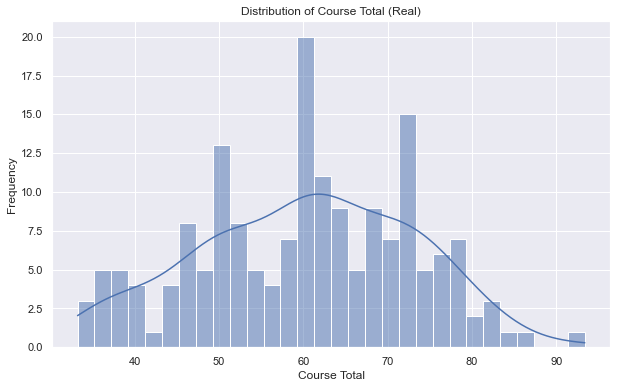

In [14]:
# Data Distributions

# Plotting the distribution of 'Course total (Real)' from the Excel DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(data_df['Course total (Real)'], bins=30, kde=True)
plt.title('Distribution of Course Total (Real)')
plt.xlabel('Course Total')
plt.ylabel('Frequency')
plt.show()


In [15]:

# Plotting the distribution of 'Event name' from the CSV DataFrame
plt.figure(figsize=(15, 8))
sns.countplot(data=log_df, y='Event name', order=csv_df['Event name'].value_counts().index)
plt.title('Distribution of Event Names')
plt.xlabel('Frequency')
plt.ylabel('Event Name')
plt.show()

NameError: name 'csv_df' is not defined

<Figure size 1080x576 with 0 Axes>

## Data Distributions

We've visualized the distributions for key columns in both datasets.

### Key Observations

1. **Course Total (Real) Distribution**: The distribution appears to be slightly right-skewed, indicating that most students have scores clustered around the lower to middle range. There are also some outliers with very high scores.
2. **Event Name Distribution**: The events are mostly dominated by 'Course viewed' and 'User graded', suggesting that these are the most frequent activities.

In [ ]:
# Correlations in Excel DataFrame

# Calculate the correlation matrix for numerical columns
data_corr_matrix = data_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Data DataFrame')
plt.show()

## Correlations

We've explored the correlations among numerical columns in the Excel DataFrame using a heatmap.

### Key Observations

The heatmap shows that there's a strong positive correlation between 'Course total (Real)' and other numerical columns. This suggests that these variables are likely to move in the same direction, which could be useful for predictive modeling.

Next, let's analyze activity patterns in the log DataFrame.

In [ ]:
# Activity Patterns in CSV DataFrame

# Extracting the hour from the 'Time' column to analyze activity patterns
log_df['Hour'] = log_df['Time'].dt.hour

# Plotting the distribution of activities by hour
plt.figure(figsize=(12, 6))
sns.countplot(data=log_df, x='Hour', palette='viridis')
plt.title('Distribution of Activities by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()